In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import matplotlib.dates as dates
import obspy
import obspy.signal.trigger as trigger
from hydrophone_data_processing import load, useful_variables, plotting, signal_processing
import event_detector_pipeline as edp
from ast import literal_eval

hydrophone_metadata = {
    'h1':{
        # start and end identifies the start time of the swarm where the amplitude magnitude is the highest
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
       # obspy_idx is the index within the stream for this data (all data is sorted from top to bottom of the borehole this way in lists)
        ,'obspy_idx':0
        # depth of the hydrophone
        ,'depth':30
        ,'velocity_model':1750
    }
    ,    'h2':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':1
        ,'depth':100        
        ,'velocity_model':1750

    }
    ,    'h3':{
        'start':obspy.UTCDateTime('2019-05-21T07:35:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T07:48:00Z')
        ,'obspy_idx':2
        ,'depth':170        
        ,'velocity_model':1750

    }
    ,'h4':{
        'start':obspy.UTCDateTime('2019-05-21T07:48:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:07:00Z')
        ,'obspy_idx':3
        ,'depth':240
        ,'velocity_model':1750
    }
    ,'h5':{
        'start':obspy.UTCDateTime('2019-05-21T08:07:00Z')
        # ,'end':obspy.UTCDateTime('2019-5-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
        ,'obspy_idx':4
        ,'depth':310
        ,'velocity_model':1750
    }
    ,'h6':{
        'start':obspy.UTCDateTime('2019-05-21T08:34:00Z')
        ,'end':obspy.UTCDateTime('2019-5-21T08:38:00Z')
       ,'obspy_idx':5
        ,'depth':380
        ,'velocity_model':1750
    }
}

In [2]:
df = pd.read_csv('precision.csv')
# df['aic_t'] = df.aic_t.apply(lambda x: literal_eval(x))
# df['aics'][5][7:-2].replace('\n','')
df['aic_t'] = df['aic_t'].apply(literal_eval)
df['aics'] = np.array(df['aics'].apply(literal_eval))
df['aic_maxes'] = df['aic_maxes'].apply(literal_eval)

In [3]:
paths = useful_variables.make_hydrophone_data_paths(borehole='a', year=2019, julian_day=141)
waveforms = load.import_corrected_data_for_single_day(paths=paths)
swarm_starttime = obspy.UTCDateTime('2019-05-21T07:30:00')
swarm_endtime = obspy.UTCDateTime('2019-05-21T08:38:30')
waveforms = waveforms.trim(starttime=swarm_starttime, endtime=swarm_endtime)

In [4]:
# # event = df.iloc[1000]
# event = df.iloc[2200]
# starttime = obspy.UTCDateTime(pd.to_datetime(event.first_arrival))
# # need to make this conform to the aic data
# window_start = starttime - 0.2
# window_end = starttime + 0.3

# window = waveforms.copy().trim(starttime=window_start, endtime=window_end)
# raw = window.copy()
# window.filter(type='bandpass', freqmin=200, freqmax=500, zerophase=False, corners=1)

# p_waveforms = window.copy()
# endtime = obspy.UTCDateTime(dates.num2date(event.arrival_time))
# p_waveforms.trim(starttime=window_start, endtime=endtime)

# fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

# for n, tr in enumerate(raw[event.first_hydrophone:]):
#     ax[n].plot(tr.times('matplotlib'), tr.data, color='black', linewidth=0.5)
#     break

# for n, tr in enumerate(p_waveforms[event.first_hydrophone:]):
#     ax[n].plot(tr.times('matplotlib'), tr.data, color='blue', linewidth=1.5)
#     break
    
# for n, tr in enumerate(window[event.first_hydrophone:]):
#     ax[n].plot(tr.times('matplotlib'), tr.data, color='dodgerblue', linewidth=1.5, alpha=0.5)
#     break

# ax[1].plot(window[event.first_hydrophone].times('matplotlib'), event.aics, color='limegreen')


# ax[1].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))

# ax[1].plot((event.arrival_time, event.arrival_time), (min(event.aics), max(event.aics)))

# ax2 = ax[1].twinx()
# aic2 = trigger.aic_simple(p_waveforms[event.first_hydrophone])
# t = p_waveforms[event.first_hydrophone].times('matplotlib')
# ax2.plot(t, aic2)


# # ax[1].set_xlim(event.first_arrival, event.arrival_time)

# parrival = t[np.argmin(aic2)]

# ax[0].vlines(x=parrival, ymin=-0.75, ymax=0.75, color='red', label='p-arrival')
# ax[0].vlines(x=event.arrival_time, ymin=-0.75, ymax=0.75, color='red', label='trapped mode arrival', linewidth=2, zorder=20, linestyle='--')

# # ax[0].set_xlim([starttime+0.05, endtime])
# ax[0].set_ylim(-0.75, 0.75)
# ax[0].legend(fontsize=15)

# fig.tight_layout()

# # you can make this more sophisticated, make it find all the peaks in the aic curve then pick the earliest peak, and you know you can control the onset window a bit as well


In [76]:
### GETS TEH DATA FOR THE EVENT

# event = df.iloc[1000]
event = df.iloc[1318]
starttime = obspy.UTCDateTime(pd.to_datetime(event.first_arrival))
# need to make this conform to the aic data
window_start = starttime - 0.2
window_end = starttime + 0.3

window = waveforms.copy().trim(starttime=window_start, endtime=window_end)
raw = window.copy()
window.filter(type='bandpass', freqmin=200, freqmax=500, zerophase=False, corners=1)

### REDUCE THE WINDOW TO DATA ONLY BEFOFRE THE DETECTION

p_waveforms = window.copy()
endtime = obspy.UTCDateTime(dates.num2date(event.arrival_time))
p_waveforms.trim(starttime=window_start, endtime=endtime)

### CALCULATE AIC ON REDUCED WINDOW

aic2 = trigger.aic_simple(p_waveforms[event.first_hydrophone])
t = p_waveforms[event.first_hydrophone].times('matplotlib')

### GET MINIMUM AIC AND USE IT TO IDENTIFY TIME POINT WHERE THAT IS
parrival = t[np.argmin(aic2)]


### CALCULATE RADIUS

parrival_t = dates.num2date(parrival)
mode_t = dates.num2date(event.arrival_time)

# relative_depth = event.depth - 310
print(hydrophone_metadata['h'+str(event.first_hydrophone+1)]['depth'])
relative_depth = event.depth - hydrophone_metadata['h'+str(event.first_hydrophone+1)]['depth']

# should i be using absolute value?
radius = np.sqrt(abs(1750**2 * (mode_t - parrival_t).total_seconds()**2 - relative_depth**2))
print(radius)

310
10.463478150213723


/home/john/anaconda3/envs/borehole/lib/python3.8/site-packages/obspy/signal/filter.py:62: UserWarning: Selected high corner frequency (500) of bandpass is at or above Nyquist (500.0). Applying a high-pass instead.
  warnings.warn(msg)


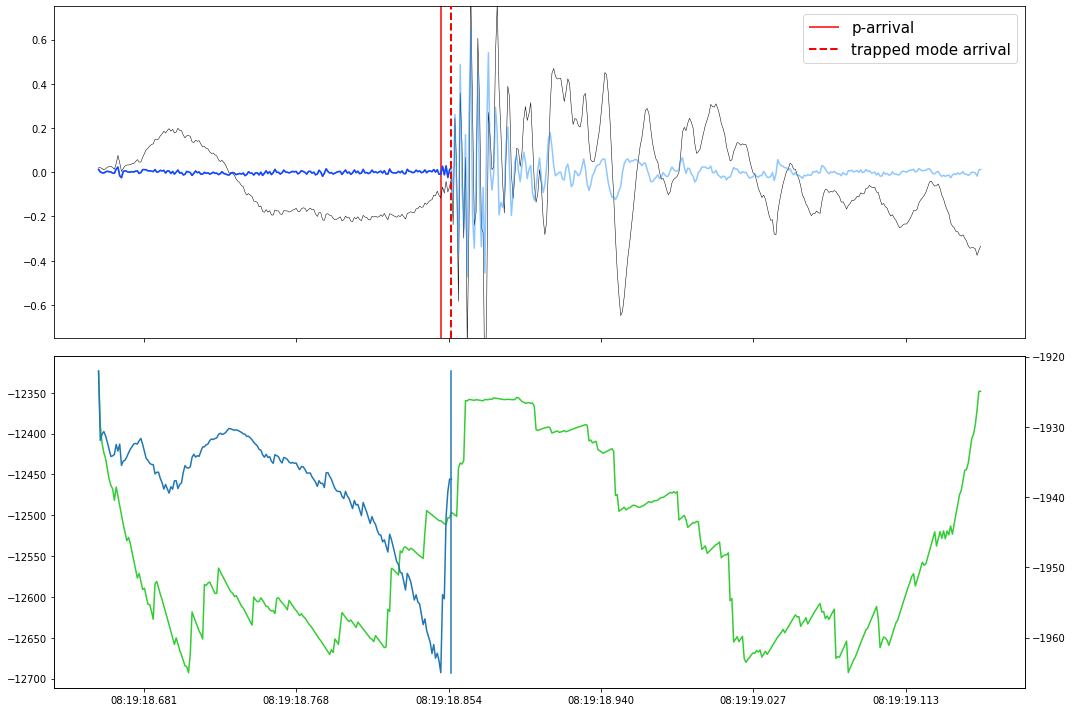

In [77]:
fig, ax = plt.subplots(2, 1, figsize=(15, 10), sharex=True)

for n, tr in enumerate(raw[event.first_hydrophone:]):
    ax[n].plot(tr.times('matplotlib'), tr.data, color='black', linewidth=0.5)
    break

for n, tr in enumerate(p_waveforms[event.first_hydrophone:]):
    ax[n].plot(tr.times('matplotlib'), tr.data, color='blue', linewidth=1.5)
    break
    
for n, tr in enumerate(window[event.first_hydrophone:]):
    ax[n].plot(tr.times('matplotlib'), tr.data, color='dodgerblue', linewidth=1.5, alpha=0.5)
    break

ax[1].plot(window[event.first_hydrophone].times('matplotlib'), event.aics, color='limegreen')


ax[1].xaxis.set_major_formatter(plotting.PrecisionDateFormatter("%H:%M:%S.{ms}"))

ax[1].plot((event.arrival_time, event.arrival_time), (min(event.aics), max(event.aics)))

ax2 = ax[1].twinx()

ax2.plot(t, aic2)


# ax[1].set_xlim(event.first_arrival, event.arrival_time)


ax[0].vlines(x=parrival, ymin=-0.75, ymax=0.75, color='red', label='p-arrival')
ax[0].vlines(x=event.arrival_time, ymin=-0.75, ymax=0.75, color='red', label='trapped mode arrival', linewidth=2, zorder=20, linestyle='--')

# ax[0].set_xlim([starttime+0.05, endtime])
ax[0].set_ylim(-0.75, 0.75)
ax[0].legend(fontsize=15)

fig.tight_layout()

# you can make this more sophisticated, make it find all the peaks in the aic curve then pick the earliest peak, and you know you can control the onset window a bit as well

In [78]:
(mode_t - parrival_t).total_seconds()

0.006

In [60]:
vrock = 5500 # m/s
vtm = 1750 # m/s
# dz = event.depth - 310 # relative depth
dz = event.depth - hydrophone_metadata['h'+str(event.first_hydrophone+1)]['depth']

parrival_t = dates.num2date(parrival)
mode_t = dates.num2date(event.arrival_time)

dt = (mode_t - parrival_t).total_seconds()

dr = - 0.5 * (dz**2 - ((dt - dz * vtm)/(vrock))**2) * ((vrock)/(dt - dz * vtm))
dr

8.181818181818181e-07

In [61]:
event

Unnamed: 0                                                         944
id                                                                 944
depth                                                            240.0
relative_depth                                                    70.0
radius                                                          215.25
aic_t                [18037.33834287037, 18037.338342916668, 18037....
aics                 [-12103.154827562355, -12174.005220578358, -12...
aic_maxes                                 [81, 85, 145, 105, 197, 151]
first_hydrophone                                                     3
second_hydrophone                                                    2
arrival_time                                              18037.338343
first_arrival                         2019-05-21 08:07:12.848000+00:00
second_arrival                        2019-05-21 08:07:12.888000+00:00
dt                                                               -0.04
parriv

In [62]:
hydrophone_metadata['h'+str(event.first_hydrophone+1)]['depth']

240

In [18]:
# todo: do a pythagorean theorem distance calculation here
parrival_t = dates.num2date(parrival)
mode_t = dates.num2date(event.arrival_time)

(mode_t - parrival_t).total_seconds()
1750**2 * (mode_t - parrival_t).total_seconds()**2

370.56249999999994

In [26]:
relative_depth = event.depth - 310
# np.sqrt(1750**2 * (mode_t - parrival_t).total_seconds()**2 - relative_depth**2)

# should i be using absolute value?
np.sqrt(abs(1750**2 * (mode_t - parrival_t).total_seconds()**2 - relative_depth**2))

17.146428199482244

In [27]:
np.sqrt(abs(1750**2 * (pd.to_datetime(event.first_arrival) - parrival_t).total_seconds()**2 - relative_depth**2))

17.146428199482244

In [21]:
# TODO : calculate radius for all values and plot along with depth
event.depth

301.25

In [22]:
np.sqrt(abs(150.0625 - 275.125))

11.18313462317252

In [25]:
hydrophone_metadata['h5']

{'start': 2019-05-21T08:07:00.000000Z,
 'end': 2019-05-21T08:38:00.000000Z,
 'obspy_idx': 4,
 'depth': 310,
 'velocity_model': 1750}

In [24]:
event

Unnamed: 0                                                        1200
id                                                                1200
depth                                                           301.25
relative_depth                                                   61.25
radius                                                       17.146428
aic_t                [18037.34468388889, 18037.34468388889, 18037.3...
aics                 [-12110.137087321084, -12182.234462004804, -12...
aic_maxes                               [199, 199, 269, 229, 199, 239]
first_hydrophone                                                     4
second_hydrophone                                                    3
arrival_time                                              18037.344684
first_arrival                         2019-05-21 08:16:20.688000+00:00
second_arrival                        2019-05-21 08:16:20.718000+00:00
dt                                                               -0.03
parriv